In [1]:
import acquire as a
import prepare as p 
%matplotlib inline
import matplotlib as plt
import seaborn as sns

In [2]:
df = a.get_activity()

In [3]:
df = p.prep_activity(df)

In [4]:
df.head()

,total_burned,steps,distance,floors,sedentary,lightly,fairly,very,active_burned,bmr,time
date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,2069,1440
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1897,1440
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,2255,890
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,2249,1013
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,2285,984


# Data Dictionary:


Steps - number of steps taken, tracked by a 3-axis accelerometer, worn on the wrist. This sensor tracks the frequency, duration, intensity, and patterns of your movement. Numbers can appear artificially lower, if walking with arms still, such as pushing a stroller. Numbers can appear artificially higher, if sensor is jarred during inactivity, such as riding down a bumpy road.

Distance – distance in miles traveled that day, calculated by multiplying steps and stride length. Stride length is a constant value determined by an individual’s height and weight. If an activity is tracked distance is calculated using GPS.

Floors – floors traveled measured by an altimeter, which is a sensor that calculates altitude based on atmospheric pressure. The device is designed to detect pressure changes based on elevation gain, but other types of pressure changes, such as a gust of wind, a weather change, or opening a door, can occasionally cause your device to register extra floors.

Zones – fitbit tracks the heartrate of the subject and records the amount of time the subject spends in defined fitness zones. These zones seem to correspond to the activity features presented in the date the have been renamed: out, fat_burn, cardio, and peak for brevity.  Each zone is described below in greater dertail.

“out of zone” – time, in minutes, spent in in “out of zone” below 50% of max heart rate. not considered exercise.

“fat burn zone” –  time, in minutes, spent in “fat burn zone” between 50 and 69% of max heart rate. Low to medium intensity workout.

“cardio zone” – time, in minutes, spent in “cardio zone” between 70 and 84% of max heart rate. Medium to high intensity workout. 

“peak zone” – time, in minutes, spent in “peak zone” greater than 85% of max heart rate. Intended for short durations of intense exercise. 

Active_burned – number of calories fit bit estimates the subject had burned during exercise. Exact method of calculation is unknown.

Total_burned – total number of calories burned during that day. Calculated using basal metabolic rate (the rate at which the subject burns calories at rest) and your activity data to estimate your calories burned. heart-rate data is also included, especially to estimate calories burned during exercise. 

BMR – number of calories burned that are not the result of activity. calculated by subtracting active_burn from total_burned
Time – total time, in minuets, that fitbit was recording. Calculated using the total of out, fat_burn, cardio, and peak columns.


In [5]:
df.describe()

,total_burned,steps,distance,floors,sedentary,lightly,fairly,very,active_burned,bmr,time
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,3401.911111,8536.186667,4.046800,12.591111,809.520000,188.235556,14.920000,33.871111,1484.546667,1917.364444,1046.546667
std,632.426578,5255.746608,2.506253,25.844174,243.232639,75.170001,15.363535,37.195986,747.795790,192.377351,187.948200
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,748.000000,41.000000
25%,3069.000000,4714.000000,2.220000,2.000000,654.000000,158.000000,3.000000,2.000000,1062.000000,1792.000000,940.000000
50%,3385.000000,7806.000000,3.680000,7.000000,750.000000,203.000000,11.000000,15.000000,1481.000000,1923.000000,996.000000
75%,3765.000000,12380.000000,5.900000,13.000000,877.000000,236.000000,21.000000,63.000000,1962.000000,2055.000000,1076.000000
max,5199.000000,25512.000000,12.000000,195.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000,2291.000000,1440.000000


# Lable Swap

It is recommended that healthy adults get at least 150 minutes of moderate aerobic activity or 75 minutes of vigorous aerobic activity per day. This comes to roughly 21 minutes of moderate activity per day or 11 minutes of vigorous activity per day.

Based on this we would expect that the subject's fairly active time to exceed his very active time here it does not

According to the fitbit website the  fairly active  or “cardio zone” should be the target zone for most people during their exercise. the very active or “peak zone” is intended for short durations.

Looking as the plot of the two columns in the subsequent graph one can see that these roles seem to be reversed.

For these reasons, and the fact that the man in the white coat, we spoke to earlier mentioned that he may have mixed up the labels we believe that the fairly active and very active columns have been swapped with one another.

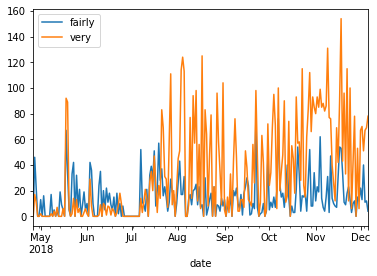

In [26]:
df[['fairly', 'very']].plot.line()

# Gender

The average daily number of calories burned by gender is:

1600-2400 for females 

2000-3000 for males

The main determining factor of the number of calories individual burns within each gender is activity. The more activity a person has the higher the number of calories they will burn.

The subject wearing the fitbit has a mean calories burned of 2145 on the days when it was “out of zone” all day.

Comparing this number calories burned with the range of average calories burned by male and female humans, we can infer that the subject is either a male with low activity or a female with moderate activity. 

Because this data was taken while the subject was “out of zone” for the full day we can conclude that the subject is likely to be male.

In [28]:
#Attempting to determine total calories burned at rest by looking only at the columns where "out of zone" is the only feature with a non zero value
df1 = df[(df.sedentary > 0) & (df.lightly==0) & (df.fairly==0) & (df.very==0)]
df1

,total_burned,steps,distance,floors,sedentary,lightly,fairly,very,active_burned,bmr,time
date,,,,,,,,,,,
2018-06-06,2145,0,0.0,0,1440,0,0,0,0,2145,1440
2018-06-07,2146,0,0.0,0,1440,0,0,0,0,2146,1440
2018-06-11,2146,0,0.0,0,1440,0,0,0,0,2146,1440
2018-06-26,2144,0,0.0,0,1440,0,0,0,0,2144,1440
2018-06-27,2145,0,0.0,0,1440,0,0,0,0,2145,1440
2018-06-28,2145,0,0.0,0,1440,0,0,0,0,2145,1440
2018-06-30,2145,0,0.0,0,1440,0,0,0,0,2145,1440
2018-07-03,2144,0,0.0,0,1440,0,0,0,0,2144,1440
2018-07-06,2144,0,0.0,0,1440,0,0,0,0,2144,1440


In [29]:
# Get mean of total calories burned in a day while subject was in 'out of zone' all day
df1.total_burned.mean()

2144.8888888888887

# Hight

Fitbit calculates a subjects distance by multiplying their steps by their stride distance as follows:

Number of steps * stride  = distance

Stride can be computed using the following formula:

Stride = height * (.415) for men

Because we know the subjects number of steps and the resulting distance we are able to calculate the subjects likely stride length. Using the stride length we are then able to calculate theb subject’s likely height.

8536(mean number of steps) * stride(ft) = 21120(mean distance(ft))

stride(ft) = 2.5

2.5 = hight(ft) * .415

hight(ft) = 6

In [31]:
df.describe()

,total_burned,steps,distance,floors,sedentary,lightly,fairly,very,active_burned,bmr,time
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,3401.911111,8536.186667,4.046800,12.591111,809.520000,188.235556,14.920000,33.871111,1484.546667,1917.364444,1046.546667
std,632.426578,5255.746608,2.506253,25.844174,243.232639,75.170001,15.363535,37.195986,747.795790,192.377351,187.948200
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,748.000000,41.000000
25%,3069.000000,4714.000000,2.220000,2.000000,654.000000,158.000000,3.000000,2.000000,1062.000000,1792.000000,940.000000
50%,3385.000000,7806.000000,3.680000,7.000000,750.000000,203.000000,11.000000,15.000000,1481.000000,1923.000000,996.000000
75%,3765.000000,12380.000000,5.900000,13.000000,877.000000,236.000000,21.000000,63.000000,1962.000000,2055.000000,1076.000000
max,5199.000000,25512.000000,12.000000,195.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000,2291.000000,1440.000000


In [33]:
21120/df.steps.mean()

2.4741726985039376

In [9]:
150/7

21.428571428571427

In [10]:
75/7

10.714285714285714

In [12]:
2145/24

89.375

In [13]:
df.index[-1]

Timestamp('2018-12-06 00:00:00')

BMR is the number of calories a person burns by simply existing. BMR varies based on age, sex, size, and genetics. To calculate BMR, a person uses inches for height, pounds for weight, and years for age in the following formulas:

For men: 66 + (6.2 x weight) + (12.7 x height) - (6.76 x age)
For women: 655.1 + (4.35 x weight) + (4.7 x height) - (4.7 x age)

AttributeError: module 'matplotlib' has no attribute 'show'

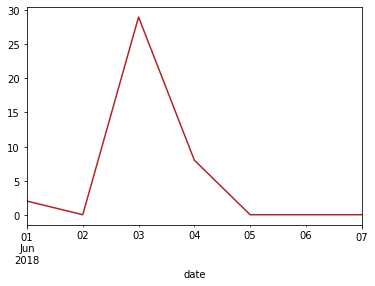

In [14]:
df['2018-06-01':'2018-06-07'].very.plot(color='firebrick')
#df['2018-06-08':'2018-06-14'].very.resample('w').plot(color='firebrick')

plt.show()


	
## OUT OF ZONE

Below 50% of your maximum heart rate	
Your heart rate may be elevated, but not enough to be considered exercise.

	
## FAT BURN ZONE

Between 50% and 69% of your maximum heart rate	
This low-to-medium intensity exercise zone may be a good place to start for those new to exercise. It’s called the fat burn zone because a higher percentage of calories are burned from fat, but the total calorie burn rate is lower than more intense exercise zones.

	
## CARDIO ZONE

Between 70% and 84% of your maximum heart rate.	
In this medium-to-high intensity exercise zone, you're pushing yourself but not straining. Most people should target this exercise zone.

## PEAK ZONE

Greater than 85% of your maximum heart rate.	
This high-intensity exercise zone is for short, intense sessions that improve performance and speed.

## HOW DOES MY FITBIT DEVICE DETECT MY HEART RATE?
When your heart beats, your capillaries expand and contract based on blood volume changes. To determine your heart rate, the optical heart-rate sensor in your Fitbit device flashes its green LEDs hundreds of times per second and uses light-sensitive photodiodes to detect these volume changes in the capillaries above your wrist. Then your device calculates how many times your heart beats per minute (BPM). The optical heart-rate sensor detects a range of 30-220 BPM.*

We use green LEDS because they maximize the signal detected from the capillaries near the surface of the skin. The optical heart-rate sensor also uses infrared light to determine when the device is on your wrist to improve the accuracy of your heart-rate data.


In [16]:
14*89

1246

In [24]:
2145-2160

-15

# df.burned.value_counts(ascending=False)

In [ ]:
df2 = df[df.time >= 1440]
df2.shape

In [ ]:
1440/60

In [ ]:
from 